<a href="https://colab.research.google.com/github/srish-23/medical-insurance-cost-prediction/blob/main/med_insurance_cost_pred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

*Data Collection and Analysis*

In [2]:
df = pd.read_csv('insurance.csv')
df.head()
#sex, smoker, and region are categorical columns

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.shape

(1338, 7)

In [6]:
#to check for missing values
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


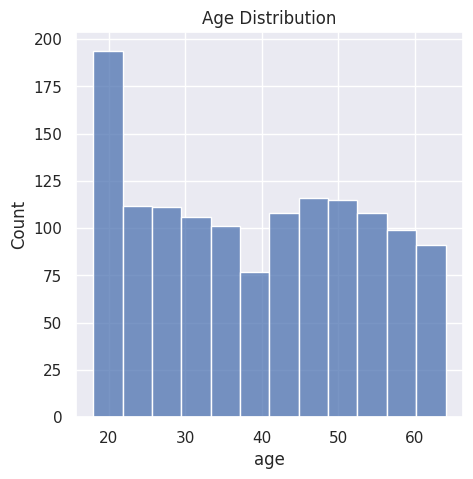

In [11]:
#age distribution
sns.set()
plt.figure(figsize = (5,5))
sns.histplot(df['age'])
plt.title('Age Distribution')
plt.show()

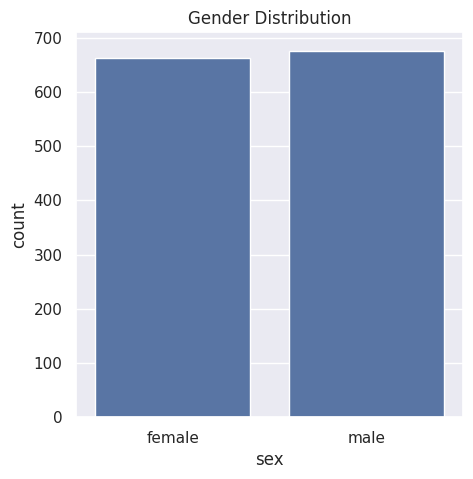

sex
male      676
female    662
Name: count, dtype: int64

In [14]:
#gender distribution
plt.figure(figsize = (5,5))
sns.countplot(x = 'sex', data = df)
plt.title('Gender Distribution')
plt.show()

df['sex'].value_counts()

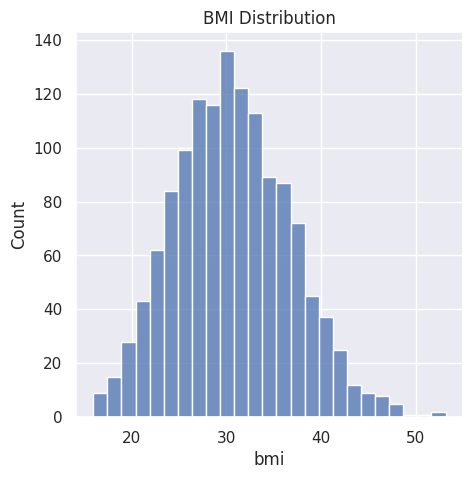

In [20]:
#bmi distribution
plt.figure(figsize = (5,5))
sns.histplot(df['bmi'])
plt.title('BMI Distribution')
plt.show()

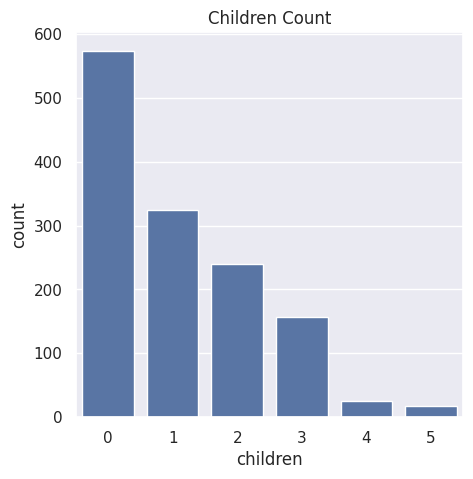

children
0    574
1    324
2    240
3    157
4     25
5     18
Name: count, dtype: int64

In [15]:
#children counts
plt.figure(figsize = (5,5))
sns.countplot(x = 'children', data = df)
plt.title('Children Count')
plt.show()

df['children'].value_counts()

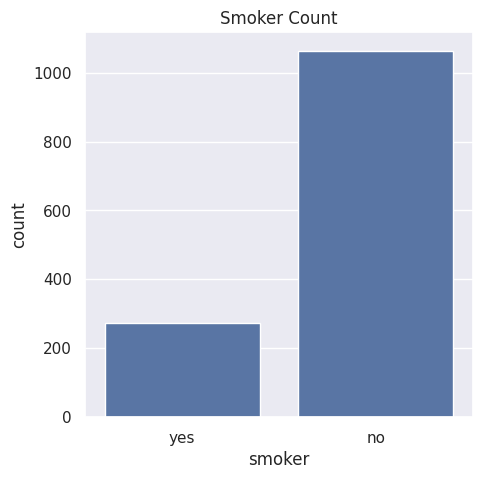

smoker
no     1064
yes     274
Name: count, dtype: int64

In [21]:
#smoker count
plt.figure(figsize = (5,5))
sns.countplot(x = 'smoker', data = df)
plt.title('Smoker Count')
plt.show()

df['smoker'].value_counts()

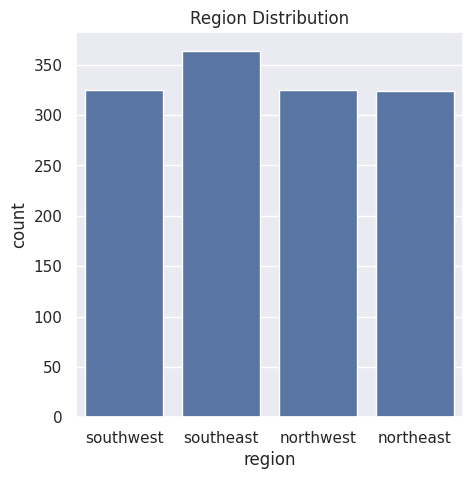

region
southeast    364
southwest    325
northwest    325
northeast    324
Name: count, dtype: int64

In [22]:
#region distribution
plt.figure(figsize = (5,5))
sns.countplot(x = 'region', data = df)
plt.title('Region Distribution')
plt.show()

df['region'].value_counts()

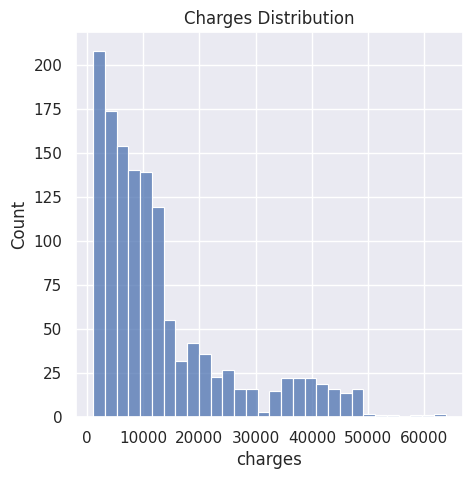

In [23]:
#charges distribution
plt.figure(figsize = (5, 5))
sns.histplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

*Data Preprocessing*

In [27]:
#encoding categorical features, because model cannot comprehend text data
df.replace({'sex':{'male':0, 'female':1}}, inplace = True)
df.replace({'smoker':{'yes':0, 'no':1}}, inplace = True)
df.replace({'region':{'southeast':0, 'southwest':1, 'northeast':2, 'northwest':3}}, inplace = True)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,0,1,16884.92400
1,18,0,33.770,1,1,0,1725.55230
2,28,0,33.000,3,1,0,4449.46200
3,33,0,22.705,0,1,3,21984.47061
4,32,0,28.880,0,1,3,3866.85520


*Making input and output variables*

In [32]:
X = df.drop(columns = 'charges', axis = 1)
Y = df['charges']

*Splitting*

In [36]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state= 2)

*Model Training*

In [37]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

*Model Evaluation*

In [40]:
training_data_pred = model.predict(X_train)

#R squared value
r2_train = metrics.r2_score(Y_train, training_data_pred)
print('R squared value: ', r2_train)

R squared value:  0.751505643411174


In [43]:
test_data_pred = model.predict(X_test)

r2_test = metrics.r2_score(Y_test, test_data_pred)
print('R squared value: ', r2_test)

R squared value:  0.7447273869684076


***Predictive System***

In [51]:
input = pd.DataFrame([ [23, 1, 23.5, 0, 0, 2]], columns = ['age','sex','bmi','children','smoker',	'region'])

# input = np.asarray(input)
# input = input.reshape(1, -1)

prediction = model.predict(input)
print("charges:", prediction[0])

charges: 25360.738293687114
